<a href="https://colab.research.google.com/github/nivalf/Predict_Energy_Usage/blob/main/predict_energy_usage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Predict Energy Usage



A dataset with information on weather in an area and the energy use of a residential building is given.
The data set comprises the timestamp the data were taken, the amount of energy used by various
home appliances and rooms, the amount of energy produced by a solar panel that was installed, *and*
various weather conditions including cloud cover, wind speed, precipitation, etc. The dataset has a
total of 30 features. This assignment’s goal is to create multiple machine learning models to
predict how much energy will be consumed and assess the effectiveness of each model using various
matrices.

##Domain Analysis


The household electric energy consumption is highly correlated to air temperature, moderately correlated to precipitation and duration of sunshine [1].

When the daily temperature rises, the daily electricity demand falls [2]. The decline in demand as the temperature rises could be attributed to a number of factors, including an increase in outside activity and a decrease in the need for heating [1]. However, it is interesting to note that this pattern isn’t essentially true from late night hours to early morning time. This is because the people would be resting during this time. The electricity usage shows high sensitivity to temperature during the day time and early night time [1].

Given that individuals are less inclined to go outside when it rains more heavily, more rainfall may be related to higher electricity demand. As in the case of temperature, rain doesn’t have much effect on the energy consumption during late nights and early mornings for the same reasons [1].

People tend to engage in more outdoor activities during sunny days leading to a reduction in the household energy consumption. However a clear pattern is observed before and after the time 15:00. It can be explained as more indoor activities might take place from morning to around 15:00 and later people get engaged in outdoor activities [1] [3] [4].

The daytime till late-night demand for power is increased by relative humidity and wind speed. This pattern is similar to that of temperature. However, all the effects of humidity and wind speed are relatively insignificant [1].

The energy consumption during weekends follow a different pattern than weekdays. This could be because people spend more time at house rather than office during weekends and the activities during weekend vary considerably from that of weekdays [1]. 

Thus, temperature, precipitation and duration of sunshine are major factors for deciding energy consumption whereas humidity and wind speed has very small influence [1]. However, the humidity and wind speed can be combined with temperature to get apparent temperature which is the perceived temperature in degrees Fahrenheit for the specified hour determined by either a combination of temperature and wind (Wind Chill) or by a combination of temperature and humidity (Heat Index). The wind chill factor will be applied to a grid point’s apparent temperature when the outside temperature drops to 50 F or less at that location. The heat index will be utilised for Apparent Temperature whenever a grid point’s temperature exceeds 80 F. The ambient air temperature is represented as the
apparent temperature between 51 and 80 F [5].

A solar panel attached to a house can generate a fair amount of energy at suitable environmental conditions. Even while solar energy can still be captured on cloudy and rainy days, the solar panel’s energy generation effectiveness is reduced. Sunlight is necessary for solar panels to efficiently collect solar energy. As a result, a few days of cloudy, rainy weather can significantly affect the energy grid. Furthermore, higher temperature doesn’t necessarily mean higher energy generation. Solar panels
have ambient working temperature which is dependent on its manufacture [6].


####References


[1] J. Kang and D. M. Reiner, “What is the effect of weather on household electricity consumption?
Empirical evidence from Ireland,” Energy Economics, vol. 111, p. 106023, 2022.

[2] L. Bl ́azquez, N. Boogen, and M. Filippini, “Residential electricity demand in spain: New empirical
evidence using aggregate data,” Energy Economics, vol. 36, p. 648–657, 2013.

[3] J. Harold, S. Lyons, and J. Cullinan, “The determinants of residential gas demand in ireland,”
Energy Economics, vol. 51, p. 475–483, 2015.

[4] V. D. Cosmo and D. O’Hora, “Nudging electricity consumption using TOU pricing and feedback:
Evidence from Irish households,” Journal of Economic Psychology, vol. 61, p. 1–14, 2017.

[5] "What is apparent temperature?". [Online]. Available: https://meteor.geol.iastate.edu/~ckarsten/bufkit/apparent_temperature.html

[6] “How does the weather affect your solar panels?” Feb 2020. [Online]. Available:
https://www.penrithsolar.com.au/blog/how-does-the-weather-affect-your-solar-panels



# 1. Import Libraries & Load Data

## Setup

First, let's import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures. We also check that Python 3.5 or later is installed, as well as Scikit-Learn ≥0.20.

In [29]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os
import pandas as pd
pd.set_option("display.max_columns", None)
from datetime import datetime

# To plot pretty figures
import seaborn as sns
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "predict_diamond_price"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

## Load the Data

In [30]:
def load_energy_usage_data():
    return pd.read_csv('https://raw.githubusercontent.com/nivalf/Predict_Energy_Usage/main/data/dataset.csv')

In [31]:
energy_usage = load_energy_usage_data()

<ipython-input-31-b80577b4aa09>:1: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  energy_usage = load_energy_usage_data()


# 2. Pre-Processing & Feature Engineering

## Clean the Data


The error observed after loading the data indicates mixed values in Column 0. 

In [32]:
energy_usage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50392 entries, 0 to 50391
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   time                 50392 non-null  object 
 1   use [kW]             50391 non-null  float64
 2   gen [kW]             50391 non-null  float64
 3   House overall [kW]   50391 non-null  float64
 4   Dishwasher [kW]      50391 non-null  float64
 5   Furnace 1 [kW]       50391 non-null  float64
 6   Furnace 2 [kW]       50391 non-null  float64
 7   Home office [kW]     50391 non-null  float64
 8   Fridge [kW]          50391 non-null  float64
 9   Wine cellar [kW]     50391 non-null  float64
 10  Garage door [kW]     50391 non-null  float64
 11  Kitchen 12 [kW]      50391 non-null  float64
 12  Kitchen 14 [kW]      50391 non-null  float64
 13  Kitchen 38 [kW]      50391 non-null  float64
 14  Barn [kW]            50391 non-null  float64
 15  Well [kW]            50391 non-null 

From the dataframe info, it can be seen that columns 1-29 has one null value.

Identifying row with NaN values:

In [33]:
energy_usage[energy_usage.isna().any(axis=1)]

,time,use [kW],gen [kW],House overall [kW],Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],Garage door [kW],Kitchen 12 [kW],Kitchen 14 [kW],Kitchen 38 [kW],Barn [kW],Well [kW],Microwave [kW],Living room [kW],Solar [kW],temperature,Weather icon,humidity,visibility,apparentTemperature,pressure,windSpeed,windBearing,precipIntensity,dewPoint,precipProbability
50391,\,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Row number 50391, which is the last row in the dataframe contains invalid data for all the columns. Thus, imputing this row.

In [34]:
energy_usage.drop(50391, inplace=True)

In [35]:
energy_usage.tail()

,time,use [kW],gen [kW],House overall [kW],Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],Garage door [kW],Kitchen 12 [kW],Kitchen 14 [kW],Kitchen 38 [kW],Barn [kW],Well [kW],Microwave [kW],Living room [kW],Solar [kW],temperature,Weather icon,humidity,visibility,apparentTemperature,pressure,windSpeed,windBearing,precipIntensity,dewPoint,precipProbability
50386,1452128260,1.621417,0.004183,1.621417,0.000033,0.441950,0.645467,0.041767,0.129317,0.008067,0.012883,0.000317,0.000050,0.000000,0.031767,0.001000,0.003017,0.001267,0.004183,35.12,rain,0.86,8.74,29.45,1011.49,6.72,186.0,0.0101,31.27,0.51
50387,1452128270,0.896250,0.004150,0.896250,0.000233,0.496633,0.063000,0.042317,0.123800,0.007850,0.012433,0.000467,0.000233,0.000000,0.031783,0.000983,0.003150,0.001283,0.004150,35.12,rain,0.86,8.74,29.45,1011.49,6.72,186.0,0.0101,31.27,0.51
50388,1452128280,1.311617,0.004167,1.311617,0.000017,0.359167,0.645433,0.041917,0.005133,0.008167,0.013083,0.000650,0.000083,0.000000,0.031833,0.001000,0.003150,0.001317,0.004167,35.12,rain,0.86,8.74,29.45,1011.49,6.72,186.0,0.0101,31.27,0.51
50389,1452128290,2.059367,0.003383,2.059367,0.000033,0.153367,0.643300,0.042050,0.005117,0.008283,0.013267,0.000433,0.000017,0.000017,0.031850,0.000983,0.003733,0.316700,0.003383,35.12,rain,0.86,8.74,29.45,1011.49,6.72,186.0,0.0101,31.27,0.51
50390,1452128300,1.522583,0.003200,1.522583,0.000067,0.023033,0.627233,0.041767,0.005283,0.008433,0.013533,0.000467,0.000167,0.000017,0.031967,0.000967,0.003783,0.000950,0.003200,35.12,rain,0.86,8.74,29.45,1011.49,6.72,186.0,0.0101,31.27,0.51


##Pre Processing

Convert the UNIX timestamp to date and time. The publisher of the dataset has mentioned that the timestamp corresponds to minutes and not seconds (was a scripting error). Thus using the sample frequency as minutes. Also, making this as the index of the dataframe.

In [36]:
#Convert Unix timestamp to datetime, use sample frequency of minutes and make it dataframe index
energy_usage['time'] = pd.to_datetime(energy_usage['time'], unit='s')
energy_usage['time'] = pd.DatetimeIndex(pd.date_range('2016-01-01 05:00', periods=len(energy_usage),  freq='10min'))
energy_usage = energy_usage.set_index('time')
energy_usage.head()

,use [kW],gen [kW],House overall [kW],Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],Garage door [kW],Kitchen 12 [kW],Kitchen 14 [kW],Kitchen 38 [kW],Barn [kW],Well [kW],Microwave [kW],Living room [kW],Solar [kW],temperature,Weather icon,humidity,visibility,apparentTemperature,pressure,windSpeed,windBearing,precipIntensity,dewPoint,precipProbability
time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-01 05:00:00,0.932833,0.003483,0.932833,0.000033,0.020700,0.061917,0.442633,0.124150,0.006983,0.013083,0.000417,0.000150,0.000000,0.031350,0.001017,0.004067,0.001517,0.003483,36.14,clear-night,0.62,10.0,29.26,1016.91,9.18,282.0,0.0,24.4,0.0
2016-01-01 05:10:00,1.585083,0.003417,1.585083,0.000050,0.022100,0.678733,0.440200,0.121450,0.007433,0.013583,0.000350,0.000117,0.000033,0.031667,0.001000,0.004200,0.001567,0.003417,36.14,clear-night,0.62,10.0,29.26,1016.91,9.18,282.0,0.0,24.4,0.0
2016-01-01 05:20:00,0.533817,0.003450,0.533817,0.000000,0.020633,0.062967,0.270033,0.004950,0.007033,0.013117,0.000750,0.000100,0.000000,0.031817,0.001017,0.004233,0.001567,0.003450,36.14,clear-night,0.62,10.0,29.26,1016.91,9.18,282.0,0.0,24.4,0.0
2016-01-01 05:30:00,1.190950,0.003083,1.190950,0.000217,0.387400,0.061883,0.256867,0.004933,0.101783,0.012533,0.000700,0.000583,0.000017,0.031750,0.001050,0.004500,0.001150,0.003083,36.14,clear-night,0.62,10.0,29.26,1016.91,9.18,282.0,0.0,24.4,0.0
2016-01-01 05:40:00,1.582083,0.003067,1.582083,0.000050,0.022050,0.681717,0.242433,0.005550,0.122400,0.013550,0.000567,0.000017,0.000033,0.031667,0.001083,0.004483,0.001167,0.003067,36.14,clear-night,0.62,10.0,29.26,1016.91,9.18,282.0,0.0,24.4,0.0


###Correlations

In [37]:
energy_usage.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 50391 entries, 2016-01-01 05:00:00 to 2016-12-16 03:20:00
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   use [kW]             50391 non-null  float64
 1   gen [kW]             50391 non-null  float64
 2   House overall [kW]   50391 non-null  float64
 3   Dishwasher [kW]      50391 non-null  float64
 4   Furnace 1 [kW]       50391 non-null  float64
 5   Furnace 2 [kW]       50391 non-null  float64
 6   Home office [kW]     50391 non-null  float64
 7   Fridge [kW]          50391 non-null  float64
 8   Wine cellar [kW]     50391 non-null  float64
 9   Garage door [kW]     50391 non-null  float64
 10  Kitchen 12 [kW]      50391 non-null  float64
 11  Kitchen 14 [kW]      50391 non-null  float64
 12  Kitchen 38 [kW]      50391 non-null  float64
 13  Barn [kW]            50391 non-null  float64
 14  Well [kW]            50391 non-null  float64
 15  M

#### Energy Correlations

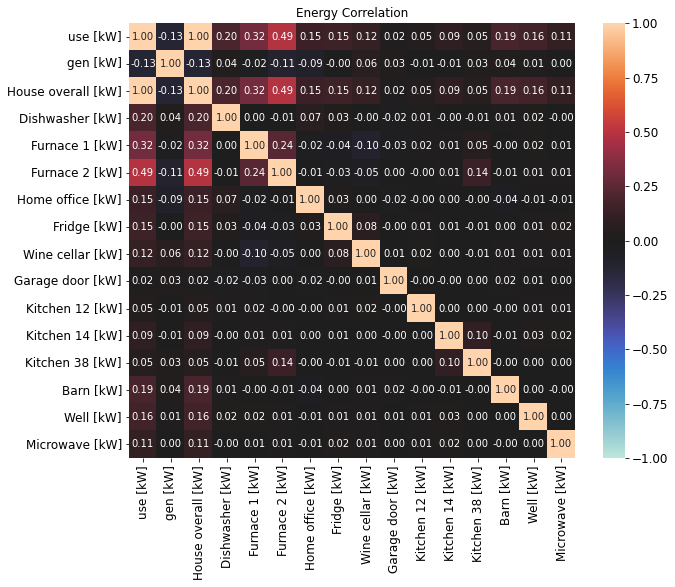

In [38]:
fig = plt.subplots(figsize=(10, 8))
sns.heatmap(energy_usage[energy_usage.columns[:16].tolist()].corr(), annot=True, fmt='.2f', vmin=-1.0, vmax=1.0, center=0)
plt.title('Energy Correlation', fontsize=12);

Energy consumption (use [kW]) has the highest correlation to Furnace 2 (0.49), followed by Furnace 1 (0.32), Dishwasher (0.20), Living Room (0.20), Barn (0.19), Well (0.16), Home office (0.15), Fridge (0.15), Wine Cellar (0.12) and Microwave (0.11). 

Use [kW] and House overall [kW] have complete correlation. Same is the case for gen [kW] and Solar [kW]. So check if these are the same values.

In [39]:
print(energy_usage['gen [kW]'].equals(energy_usage['Solar [kW]']))
print(energy_usage['use [kW]'].equals(energy_usage['House overall [kW]']))

True
True


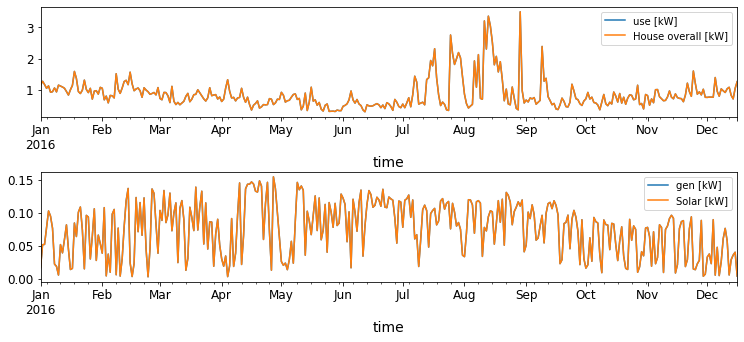

In [40]:
fig, axes = plt.subplots(2,1, figsize=(11,5))
# using padding
fig.tight_layout(pad=3.0)
energy_usage[['use [kW]','House overall [kW]']].resample('D').mean().plot(ax=axes[0])
energy_usage[['gen [kW]','Solar [kW]']].resample('D').mean().plot(ax=axes[1])

The columns (use [kW], House overall [kW]) and (gen [kW], Solar [kW]) are duplicates. One of each can be dropped.

In [41]:
energy_usage.drop(['use [kW]', 'gen [kW]'], axis=1, inplace=True)

#### Weather Correlations


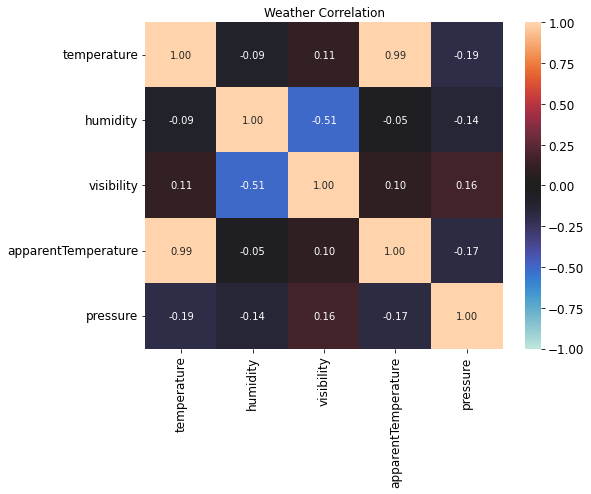

In [42]:
fig = plt.subplots(figsize=(8, 6))
sns.heatmap(energy_usage[energy_usage.columns[16:-5].tolist()].corr(), annot=True, fmt='.2f', vmin=-1.0, vmax=1.0, center=0)
plt.title('Weather Correlation', fontsize=12);

Among the weather features, apparentTemperature is highly correlated to temperature (0.99) and dewPoint (0.90), while precipIntensity is correlated to precipProbability (0.79). Visibility has negative correlation with humidity (-0.51), precipProbability (-0.49) and precipIntensity (-0.41). Humidity also has negative correlation with windspeed (-0.45) and positive correlations with dewPoint (0.37), precipProbability (0.32) and precipIntensity (0.24).

#### Total Correlations

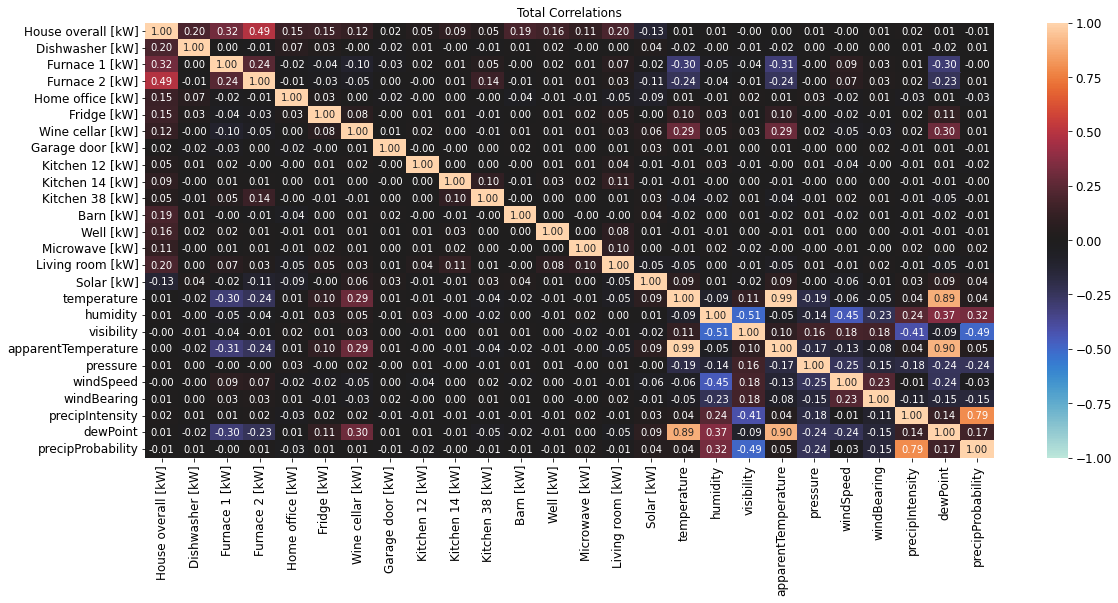

In [43]:
fig = plt.subplots(figsize=(19, 8))
sns.heatmap(energy_usage[energy_usage.columns.tolist()].corr(), annot=True, fmt='.2f', vmin=-1.0, vmax=1.0, center=0)
plt.title('Total Correlations', fontsize=12);



Temperature, apparentTemperature and dewPoint have high negative correlation (~ -0.30) to the Furnaces which in turn has high positive correlation to energy usage. Furthermore, these three features have high positive correlation to Wine Cellar (\~0.30) and Fridge (~0.10).



### Visualise Data

In [44]:
energy_usage.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 50391 entries, 2016-01-01 05:00:00 to 2016-12-16 03:20:00
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   House overall [kW]   50391 non-null  float64
 1   Dishwasher [kW]      50391 non-null  float64
 2   Furnace 1 [kW]       50391 non-null  float64
 3   Furnace 2 [kW]       50391 non-null  float64
 4   Home office [kW]     50391 non-null  float64
 5   Fridge [kW]          50391 non-null  float64
 6   Wine cellar [kW]     50391 non-null  float64
 7   Garage door [kW]     50391 non-null  float64
 8   Kitchen 12 [kW]      50391 non-null  float64
 9   Kitchen 14 [kW]      50391 non-null  float64
 10  Kitchen 38 [kW]      50391 non-null  float64
 11  Barn [kW]            50391 non-null  float64
 12  Well [kW]            50391 non-null  float64
 13  Microwave [kW]       50391 non-null  float64
 14  Living room [kW]     50391 non-null  float64
 15  S

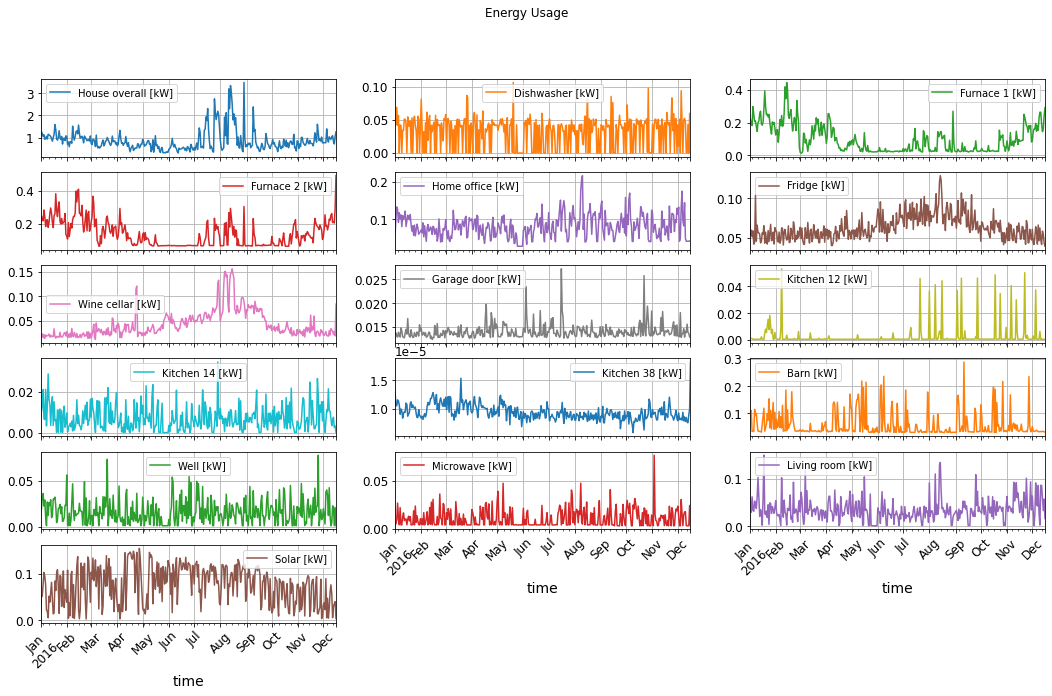

In [45]:
energy_usage[energy_usage.columns[0:16].tolist()].resample("D").mean().plot(subplots=True, layout=(-1, 3), figsize=(18, 10),
                                                                grid=True, rot=45, title="Energy Usage");

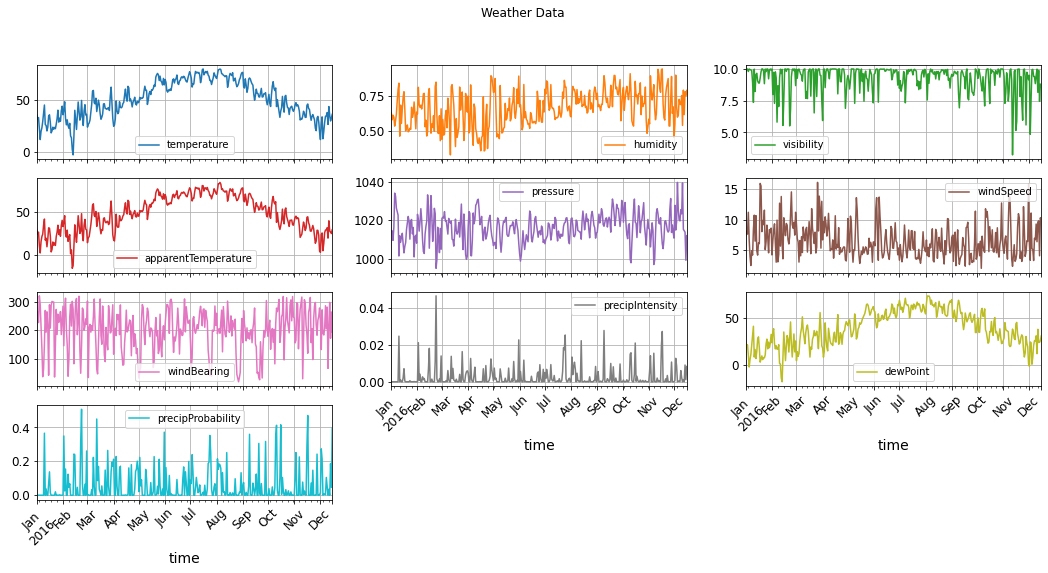

In [46]:
energy_usage[energy_usage.columns[16:27].tolist()].resample("D").mean().plot(subplots=True, layout=(-1, 3), figsize=(18, 8),
                                                                grid=True, rot=45, title="Weather Data");

#### Average Consumptions

Define month, day, weekday, hour & minute from date time.

In [47]:
energy_usage['month'] = energy_usage.index.month
energy_usage['day'] = energy_usage.index.day
energy_usage['weekday'] = energy_usage.index.day_name()
energy_usage['hour'] = energy_usage.index.hour
energy_usage['minute'] = energy_usage.index.minute
energy_usage.head()

,House overall [kW],Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],Garage door [kW],Kitchen 12 [kW],Kitchen 14 [kW],Kitchen 38 [kW],Barn [kW],Well [kW],Microwave [kW],Living room [kW],Solar [kW],temperature,Weather icon,humidity,visibility,apparentTemperature,pressure,windSpeed,windBearing,precipIntensity,dewPoint,precipProbability,month,day,weekday,hour,minute
time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-01 05:00:00,0.932833,0.000033,0.020700,0.061917,0.442633,0.124150,0.006983,0.013083,0.000417,0.000150,0.000000,0.031350,0.001017,0.004067,0.001517,0.003483,36.14,clear-night,0.62,10.0,29.26,1016.91,9.18,282.0,0.0,24.4,0.0,1,1,Friday,5,0
2016-01-01 05:10:00,1.585083,0.000050,0.022100,0.678733,0.440200,0.121450,0.007433,0.013583,0.000350,0.000117,0.000033,0.031667,0.001000,0.004200,0.001567,0.003417,36.14,clear-night,0.62,10.0,29.26,1016.91,9.18,282.0,0.0,24.4,0.0,1,1,Friday,5,10
2016-01-01 05:20:00,0.533817,0.000000,0.020633,0.062967,0.270033,0.004950,0.007033,0.013117,0.000750,0.000100,0.000000,0.031817,0.001017,0.004233,0.001567,0.003450,36.14,clear-night,0.62,10.0,29.26,1016.91,9.18,282.0,0.0,24.4,0.0,1,1,Friday,5,20
2016-01-01 05:30:00,1.190950,0.000217,0.387400,0.061883,0.256867,0.004933,0.101783,0.012533,0.000700,0.000583,0.000017,0.031750,0.001050,0.004500,0.001150,0.003083,36.14,clear-night,0.62,10.0,29.26,1016.91,9.18,282.0,0.0,24.4,0.0,1,1,Friday,5,30
2016-01-01 05:40:00,1.582083,0.000050,0.022050,0.681717,0.242433,0.005550,0.122400,0.013550,0.000567,0.000017,0.000033,0.031667,0.001083,0.004483,0.001167,0.003067,36.14,clear-night,0.62,10.0,29.26,1016.91,9.18,282.0,0.0,24.4,0.0,1,1,Friday,5,40


#### Monthly Average

In [48]:
energy_usage_avg = energy_usage.drop("Weather icon", axis=1)

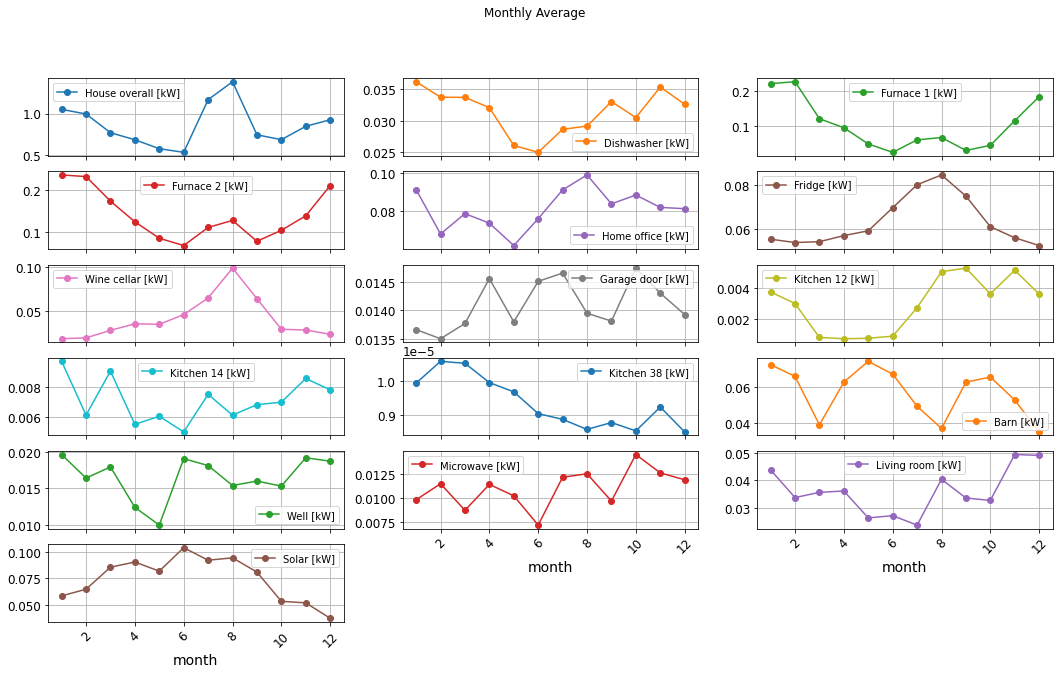

In [49]:
mean_month = energy_usage_avg.groupby('month').agg({i:'mean' for i in energy_usage_avg.columns[:-5].tolist()})
mean_month[mean_month.columns[0:16].tolist()].plot(subplots=True, layout=(-1, 3), figsize=(18, 10),
                                                       grid=True, rot=45, xlabel=None, marker='o', title="Monthly Average");

#### Daily Average

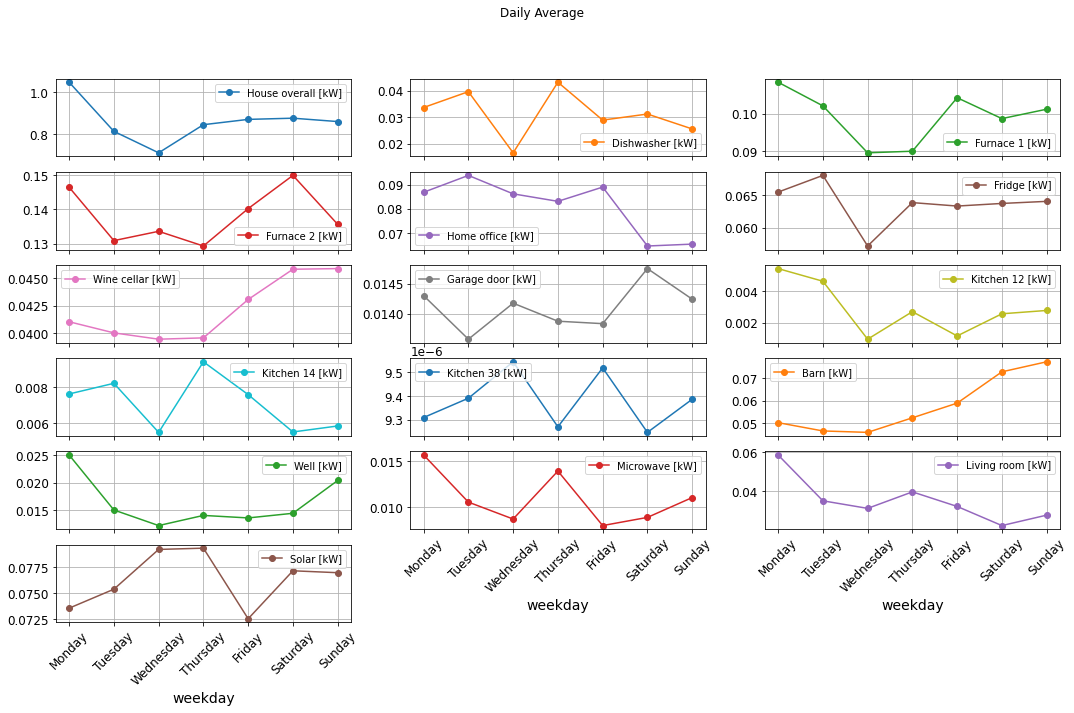

In [50]:
days = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
mean_weekday = energy_usage_avg.groupby('weekday').agg({i:'mean' for i in energy_usage_avg.columns[:-5].tolist()}).reindex(days)

mean_weekday[mean_weekday.columns[0:16].tolist()].plot(subplots=True, layout=(-1, 3), figsize=(18, 10),
                                                       grid=True, rot=45, xlabel=None, marker='o', title="Daily Average");

#### Hourly Average

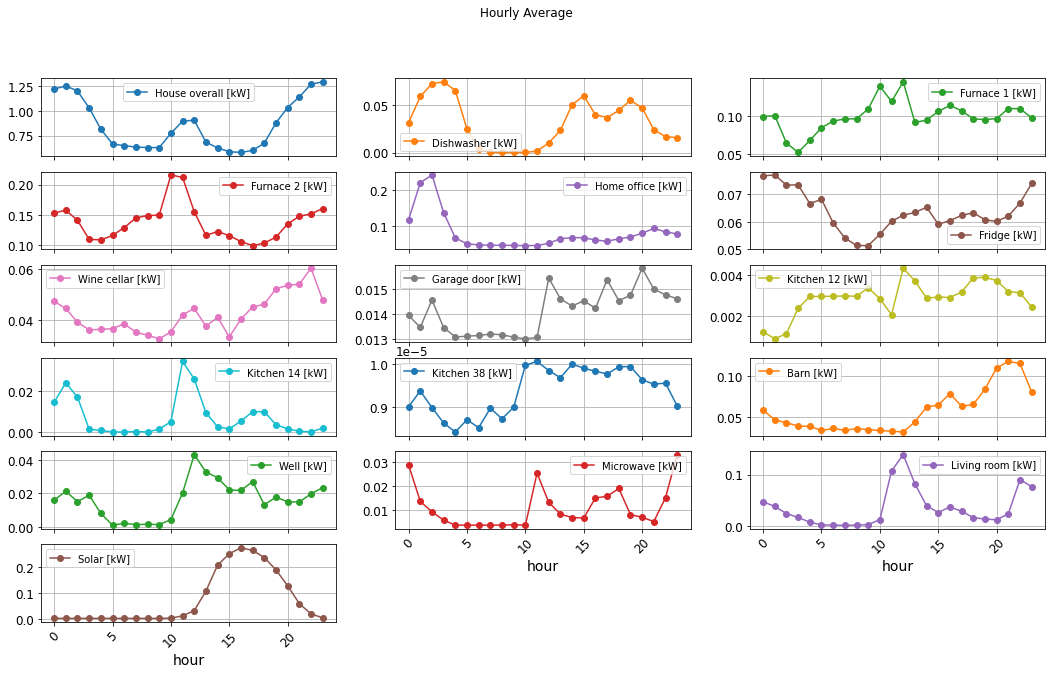

In [51]:
mean_hour = energy_usage_avg.groupby('hour').agg({i:'mean' for i in energy_usage_avg.columns[:-5].tolist()})

mean_hour[mean_hour.columns[0:16].tolist()].plot(subplots=True, layout=(-1, 3), figsize=(18, 10),
                                                       grid=True, rot=45, xlabel=None, marker='o', title="Hourly Average");

In [52]:
energy_usage.columns[:-3]

Index(['House overall [kW]', 'Dishwasher [kW]', 'Furnace 1 [kW]',
       'Furnace 2 [kW]', 'Home office [kW]', 'Fridge [kW]', 'Wine cellar [kW]',
       'Garage door [kW]', 'Kitchen 12 [kW]', 'Kitchen 14 [kW]',
       'Kitchen 38 [kW]', 'Barn [kW]', 'Well [kW]', 'Microwave [kW]',
       'Living room [kW]', 'Solar [kW]', 'temperature', 'Weather icon',
       'humidity', 'visibility', 'apparentTemperature', 'pressure',
       'windSpeed', 'windBearing', 'precipIntensity', 'dewPoint',
       'precipProbability', 'month', 'day'],
      dtype='object')